<a href="https://colab.research.google.com/github/Aydino/carbon/blob/main/Carbon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carbon analysis. 

First import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)


Import data

In [2]:
df = pd.read_csv("Data.csv")
# To display the top 5 rows 
df.head(5)  

,BLDG_PUBID,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,$BLDG_AREA_M2,$BLDG_AREA_FT2,BLDG_STOR_A,$BLDG_STOR_A,LCA_YEAR,LCA_REFPERIOD,LCA_SOUR_CODE,LCA_STAGES,LCA_BLDG_SCOPE,LCA_MAT_Q,EC_WB_EX_OPER,EC_LCAA_PERM2
0,A00,Commercial,Mixed use,Middle East,New,46452 to 92903,"500,001 to 1 million",0,More than 25,2016.0,40.0,41.0,AB,SF,Y,2567.39,2521.63
1,A00,Commercial,Other,North America,New,46452 to 92903,"500,001 to 1 million",0,7 to 14,2016.0,40.0,41.0,AB,SF,Y,1699.34,1332.55
2,A00,Commercial,Office,Europe,New,46452 to 92903,"500,001 to 1 million",0,More than 25,2016.0,40.0,41.0,AB,SF,Y,1303.39,1031.76
3,A00,Commercial,Other,North America,New,930 to 2323,"10,001 to 25,000",0,1 to 6,2016.0,40.0,41.0,AB,SF,Y,1211.33,938.69
4,A00,Commercial,Office,Asia-Pacific,New,Over 92903,Over 1 million,0,15 to 25,2016.0,40.0,41.0,AB,SF,Y,1087.86,937.59


Checking the types of data

In [3]:
df.dtypes

BLDG_PUBID          object
BLDG_TYP            object
BLDG_US             object
BLDG_LOC_REGION     object
BLDG_NEW_REN        object
$BLDG_AREA_M2       object
$BLDG_AREA_FT2      object
BLDG_STOR_A          int64
$BLDG_STOR_A        object
LCA_YEAR           float64
LCA_REFPERIOD      float64
LCA_SOUR_CODE      float64
LCA_STAGES          object
LCA_BLDG_SCOPE      object
LCA_MAT_Q           object
EC_WB_EX_OPER      float64
EC_LCAA_PERM2      float64
dtype: object

Dropping irrelevant columns

In [4]:
df=df.drop(['BLDG_PUBID','BLDG_STOR_A','LCA_YEAR','LCA_REFPERIOD','LCA_SOUR_CODE','LCA_STAGES','LCA_BLDG_SCOPE','LCA_MAT_Q' ],axis=1)
df.head(5)


,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,$BLDG_AREA_M2,$BLDG_AREA_FT2,$BLDG_STOR_A,EC_WB_EX_OPER,EC_LCAA_PERM2
0,Commercial,Mixed use,Middle East,New,46452 to 92903,"500,001 to 1 million",More than 25,2567.39,2521.63
1,Commercial,Other,North America,New,46452 to 92903,"500,001 to 1 million",7 to 14,1699.34,1332.55
2,Commercial,Office,Europe,New,46452 to 92903,"500,001 to 1 million",More than 25,1303.39,1031.76
3,Commercial,Other,North America,New,930 to 2323,"10,001 to 25,000",1 to 6,1211.33,938.69
4,Commercial,Office,Asia-Pacific,New,Over 92903,Over 1 million,15 to 25,1087.86,937.59


In [5]:
df.shape

(1191, 9)

Dublicate Check

In [6]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (58, 9)


Drop Dublicates

In [7]:
df = df.drop_duplicates()
df.head(5)

,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,$BLDG_AREA_M2,$BLDG_AREA_FT2,$BLDG_STOR_A,EC_WB_EX_OPER,EC_LCAA_PERM2
0,Commercial,Mixed use,Middle East,New,46452 to 92903,"500,001 to 1 million",More than 25,2567.39,2521.63
1,Commercial,Other,North America,New,46452 to 92903,"500,001 to 1 million",7 to 14,1699.34,1332.55
2,Commercial,Office,Europe,New,46452 to 92903,"500,001 to 1 million",More than 25,1303.39,1031.76
3,Commercial,Other,North America,New,930 to 2323,"10,001 to 25,000",1 to 6,1211.33,938.69
4,Commercial,Office,Asia-Pacific,New,Over 92903,Over 1 million,15 to 25,1087.86,937.59


In [9]:
df.count()

BLDG_TYP           1120
BLDG_US            1119
BLDG_LOC_REGION    1002
BLDG_NEW_REN       1117
$BLDG_AREA_M2      1131
$BLDG_AREA_FT2     1131
$BLDG_STOR_A       1070
EC_WB_EX_OPER      1124
EC_LCAA_PERM2       988
dtype: int64

Dropping the missing or null values.

In [10]:
print(df.isnull().sum())

BLDG_TYP            13
BLDG_US             14
BLDG_LOC_REGION    131
BLDG_NEW_REN        16
$BLDG_AREA_M2        2
$BLDG_AREA_FT2       2
$BLDG_STOR_A        63
EC_WB_EX_OPER        9
EC_LCAA_PERM2      145
dtype: int64


In [11]:
df = df.dropna()    # Dropping the missing values and zeros
df.count()

BLDG_TYP           840
BLDG_US            840
BLDG_LOC_REGION    840
BLDG_NEW_REN       840
$BLDG_AREA_M2      840
$BLDG_AREA_FT2     840
$BLDG_STOR_A       840
EC_WB_EX_OPER      840
EC_LCAA_PERM2      840
dtype: int64

In [12]:
print(df.isnull().sum())   # After dropping the values

BLDG_TYP           0
BLDG_US            0
BLDG_LOC_REGION    0
BLDG_NEW_REN       0
$BLDG_AREA_M2      0
$BLDG_AREA_FT2     0
$BLDG_STOR_A       0
EC_WB_EX_OPER      0
EC_LCAA_PERM2      0
dtype: int64


Detecting Outliers

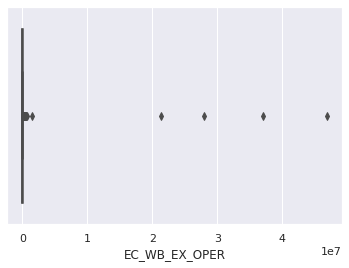

In [13]:
sns.boxplot(x=df['EC_WB_EX_OPER'])

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

EC_WB_EX_OPER    21576.9575
EC_LCAA_PERM2      286.3400
dtype: float64


Outliers elimination

In [15]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(673, 9)

Change Column Names

In [20]:
df = df.rename(columns={'$BLDG_AREA_M2':'BLDG_AREA_M2','$BLDG_AREA_FT2':'BLDG_AREA_FT2','$BLDG_STOR_A':'BLDG_STOR_A'})
df.head(5)

,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,BLDG_AREA_M2,BLDG_AREA_FT2,BLDG_STOR_A,EC_WB_EX_OPER,EC_LCAA_PERM2
3,Commercial,Other,North America,New,930 to 2323,"10,001 to 25,000",1 to 6,1211.33,938.69
4,Commercial,Office,Asia-Pacific,New,Over 92903,Over 1 million,15 to 25,1087.86,937.59
5,Commercial,Office,Asia-Pacific,New,46452 to 92903,"500,001 to 1 million",1 to 6,992.27,923.30
6,Commercial,Other,North America,New,18581 to 46451,"200,001 to 500,000",1 to 6,1185.57,917.93
7,Commercial,Other,North America,New,18581 to 46451,"200,001 to 500,000",1 to 6,1140.08,882.65


Add column

In [27]:
df['Area']=df['EC_WB_EX_OPER']*1000/df['EC_LCAA_PERM2']
df.head(5)

,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,BLDG_AREA_M2,BLDG_AREA_FT2,BLDG_STOR_A,EC_WB_EX_OPER,EC_LCAA_PERM2,Area
3,Commercial,Other,North America,New,930 to 2323,"10,001 to 25,000",1 to 6,1211.33,938.69,1290.447326
4,Commercial,Office,Asia-Pacific,New,Over 92903,Over 1 million,15 to 25,1087.86,937.59,1160.272614
5,Commercial,Office,Asia-Pacific,New,46452 to 92903,"500,001 to 1 million",1 to 6,992.27,923.30,1074.699448
6,Commercial,Other,North America,New,18581 to 46451,"200,001 to 500,000",1 to 6,1185.57,917.93,1291.569074
7,Commercial,Other,North America,New,18581 to 46451,"200,001 to 500,000",1 to 6,1140.08,882.65,1291.655809


Histogram---------

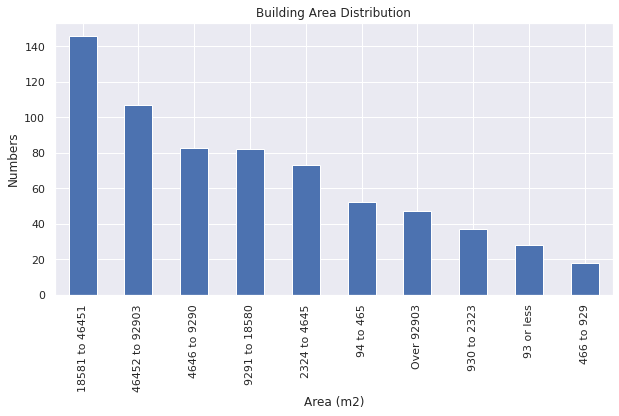

In [25]:
df.BLDG_AREA_M2.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Building Area Distribution")
plt.ylabel('Numbers')
plt.xlabel('Area (m2)');

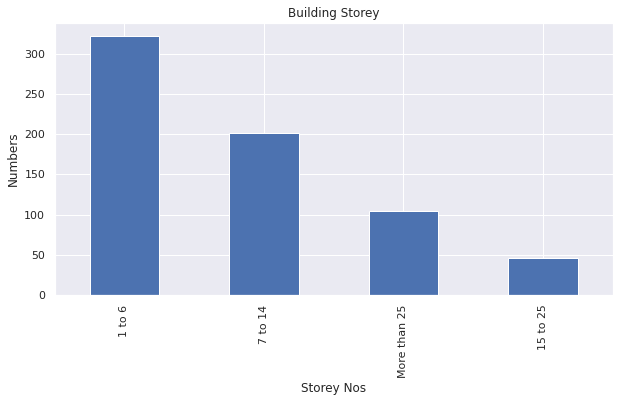

In [33]:
df.BLDG_STOR_A.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Building Storey")
plt.ylabel('Numbers')
plt.xlabel('Storey Nos');

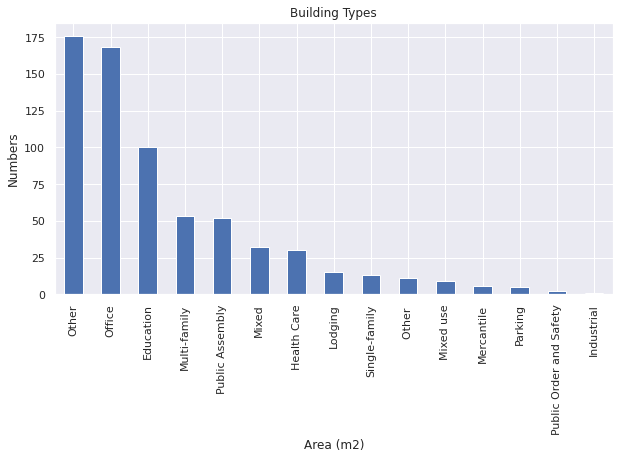

In [32]:
df.BLDG_US.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Building Types")
plt.ylabel('Numbers')
plt.xlabel('Type');

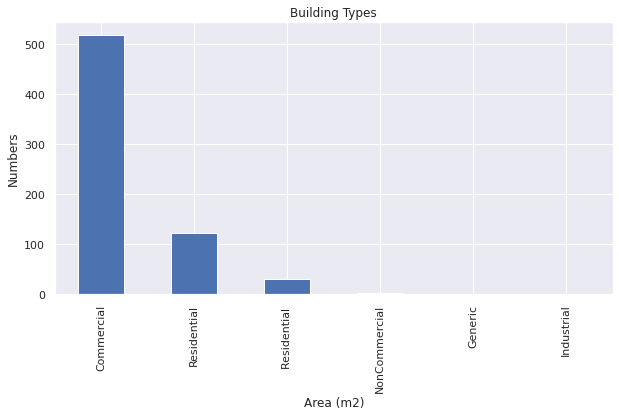

In [34]:
df.BLDG_TYP.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Building Types")
plt.ylabel('Numbers')
plt.xlabel('Area (m2)');

Let's check corr betweeen total carbon and unit carbon.

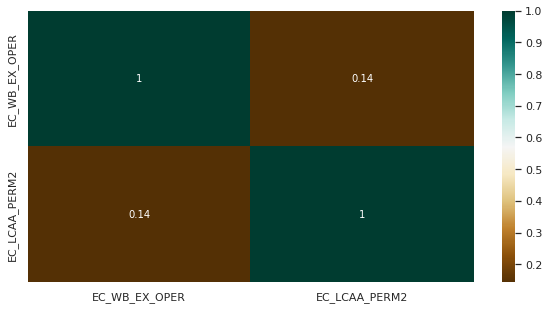

In [26]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

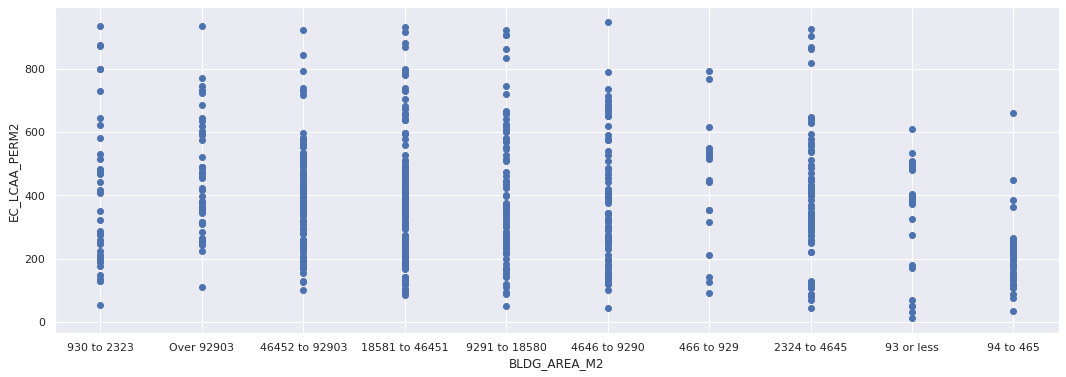

In [29]:
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df['BLDG_AREA_M2'], df['EC_LCAA_PERM2'])
ax.set_xlabel('BLDG_AREA_M2')
ax.set_ylabel('EC_LCAA_PERM2')
plt.show()

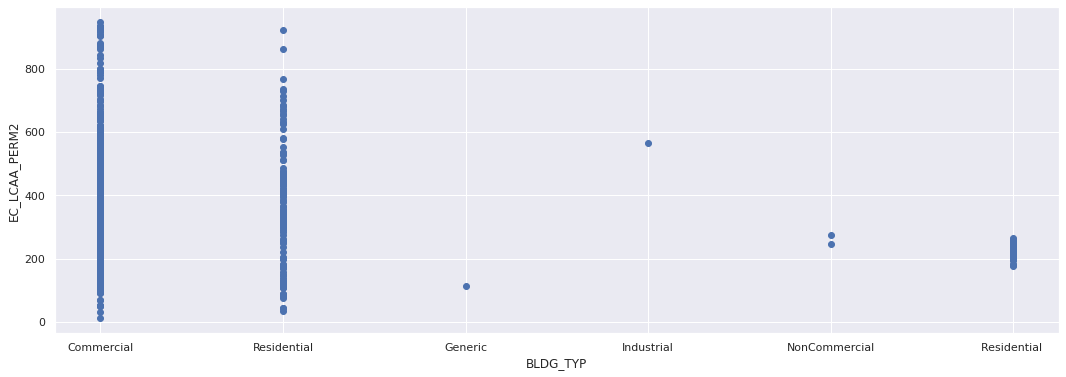

In [31]:
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df['BLDG_TYP'], df['EC_LCAA_PERM2'])
ax.set_xlabel('BLDG_TYP')
ax.set_ylabel('EC_LCAA_PERM2')
plt.show()

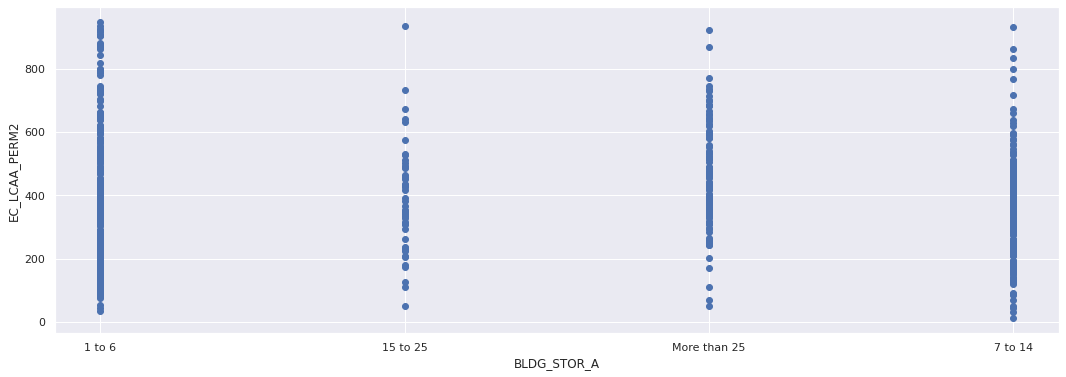

In [35]:
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df['BLDG_STOR_A'], df['EC_LCAA_PERM2'])
ax.set_xlabel('BLDG_STOR_A')
ax.set_ylabel('EC_LCAA_PERM2')
plt.show()

Statistical data of the data frame

In [39]:
df['EC_LCAA_PERM2'].describe()

count    673.000000
mean     374.075245
std      192.614461
min       10.000000
25%      230.000000
50%      352.000000
75%      485.000000
max      950.000000
Name: EC_LCAA_PERM2, dtype: float64

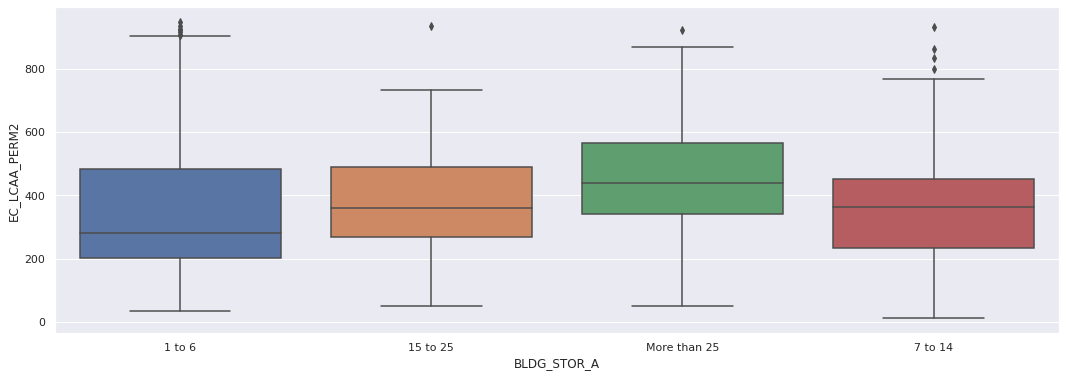

In [43]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.boxplot(x='BLDG_STOR_A', y='EC_LCAA_PERM2', data=df, orient="v")

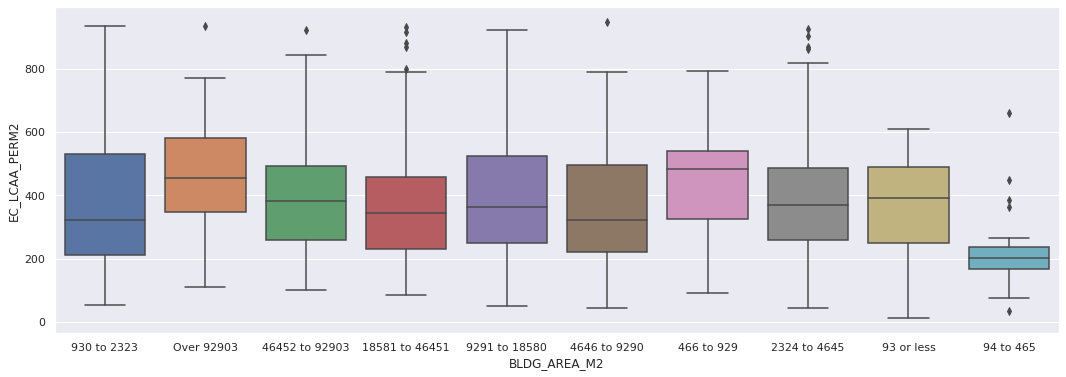

In [44]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.boxplot(x='BLDG_AREA_M2', y='EC_LCAA_PERM2', data=df, orient="v")